# Logistic Regression with a Neural Network mindset

Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent) 
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images. 

(209, 64, 64, 3)
type=train_set_x_orig <class 'numpy.ndarray'>
shape of image =  (64, 64, 3)
[1]
type of  <class 'numpy.ndarray'>
squeeze= 1
y = [1], it's a 'cat' picture.


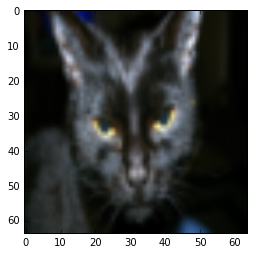

In [37]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print(train_set_x_orig.shape)
print("type=train_set_x_orig",type(train_set_x_orig))
print("shape of image = ",train_set_x_orig[index].shape)
print(train_set_y[:, index])#结果是一个矩阵
print("type of ",type(train_set_y[:, index]))
print("squeeze=",np.squeeze(train_set_y[:, index]))#获取对应的y值
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs. 

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [38]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = len(train_set_x_orig)
m_test = len(test_set_x_orig)
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


**Expected Output for m_train, m_test and num_px**: 
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td> 
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td> 
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td> 
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [39]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
print("train_set_x_orig shape=",train_set_x_orig.shape)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_orig shape= (209, 64, 64, 3)
train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


**Expected Output**: 

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td> 
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td> 
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td> 
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td> 
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td> 
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [8]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions. Use np.exp().

In [9]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [10]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [ 0.5         0.88079708]


**Expected Output**: 

<table>
  <tr>
    <td>**sigmoid([0, 2])**</td>
    <td> [ 0.5         0.88079708]</td> 
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [11]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [40]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


**Expected Output**: 


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [42]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X)+b)            # compute activation
    cost = -np.sum(np.dot(Y,np.log(A).T) + np.dot(1-Y,np.log(1-A).T))/m         # compute cost 有疑问？？为何转置操作呢？？
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = np.dot(X,(A-Y).T)/m
    db = np.sum(A-Y,axis = 1, keepdims=True)/m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    print("cost=",cost)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [43]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

cost= 6.00006477319
dw = [[ 0.99993216]
 [ 1.99980262]]
db = [[ 0.49993523]]
cost = 6.00006477319


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### d) Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [15]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [16]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = [[ 1.55930492]]
dw = [[ 0.90158428]
 [ 1.76250842]]
db = [[ 0.43046207]]


**Expected Output**: 

<table style="width:40%">
    <tr>
       <td> **w** </td>
       <td>[[ 0.1124579 ]
 [ 0.23106775]] </td>
    </tr>
    
    <tr>
       <td> **b** </td>
       <td> 1.55930492484 </td>
    </tr>
    <tr>
       <td> **dw** </td>
       <td> [[ 0.90158428]
 [ 1.76250842]] </td>
    </tr>
    <tr>
       <td> **db** </td>
       <td> 0.430462071679 </td>
    </tr>

</table>

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [56]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    print("size of X=",X.shape)
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    print("shape size of w=",w.shape)
    w = w.reshape(X.shape[0], 1)
    print("reshape size of w=",w.shape)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X)+b)
    ### END CODE HERE ###
    print("size of A=",A.shape)
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0,i] >= 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [57]:
print ("predictions = " + str(predict(w, b, X)))

size of X= (2, 2)
shape size of w= (2, 1)
reshape size of w= (2, 1)
size of A= (1, 2)
predictions = [[ 1.  1.]]


**Expected Output**: 

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient 
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [58]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Run the following cell to train your model.

In [66]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

cost= 0.69314718056
Cost after iteration 0: 0.693147
cost= 0.741029414507
cost= 0.753153581886
cost= 0.86670869567
cost= 0.768563500661
cost= 0.897014473645
cost= 0.755613228057
cost= 0.880436642684
cost= 0.751485268204
cost= 0.8771330534
cost= 0.74494035781
cost= 0.869479030571
cost= 0.73953807615
cost= 0.863181382786
cost= 0.73411403731
cost= 0.856498874501
cost= 0.728988316667
cost= 0.849994712172
cost= 0.724030059141
cost= 0.843519150241
cost= 0.719248930311
cost= 0.837129766864
cost= 0.714617846145
cost= 0.830819647437
cost= 0.710123712569
cost= 0.824596815641
cost= 0.70575259122
cost= 0.818462789309
cost= 0.701493239301
cost= 0.812418954359
cost= 0.697335781955
cost= 0.806465356276
cost= 0.69327171285
cost= 0.800601347403
cost= 0.689293620533
cost= 0.794825697727
cost= 0.685395026814
cost= 0.789136773708
cost= 0.681570238135
cost= 0.783532655923
cost= 0.677814225655
cost= 0.778011234492
cost= 0.674122525176
cost= 0.772570281605
cost= 0.670491154176
cost= 0.767207507205
cost= 0.66

cost= 0.333030845013
cost= 0.332715925128
cost= 0.332401717706
cost= 0.332088212443
cost= 0.331775405552
cost= 0.331463289328
Cost after iteration 400: 0.331463
cost= 0.331151859807
cost= 0.330841111013
cost= 0.330531039071
cost= 0.330221639168
cost= 0.32991290763
cost= 0.329604840429
cost= 0.329297434129
cost= 0.328990685239
cost= 0.328684590551
cost= 0.328379146942
cost= 0.328074351408
cost= 0.327770201085
cost= 0.32746669314
cost= 0.327163824892
cost= 0.326861593648
cost= 0.326559996861
cost= 0.32625903195
cost= 0.325958696466
cost= 0.325658987921
cost= 0.325359903937
cost= 0.325061442104
cost= 0.3247636001
cost= 0.324466375576
cost= 0.324169766256
cost= 0.323873769843
cost= 0.323578384098
cost= 0.323283606768
cost= 0.322989435648
cost= 0.322695868522
cost= 0.322402903216
cost= 0.322110537546
cost= 0.321818769366
cost= 0.321527596523
cost= 0.321237016894
cost= 0.320947028358
cost= 0.320657628815
cost= 0.320368816168
cost= 0.320080588342
cost= 0.319792943266
cost= 0.319505878888
cost

cost= 0.243579978072
cost= 0.243419830217
cost= 0.243259899019
cost= 0.243100183998
cost= 0.242940684678
Cost after iteration 800: 0.242941
cost= 0.242781400581
cost= 0.242622331233
cost= 0.242463476161
cost= 0.242304834892
cost= 0.242146406957
cost= 0.241988191887
cost= 0.241830189215
cost= 0.241672398474
cost= 0.2415148192
cost= 0.241357450931
cost= 0.241200293206
cost= 0.241043345563
cost= 0.240886607545
cost= 0.240730078696
cost= 0.240573758558
cost= 0.240417646678
cost= 0.240261742603
cost= 0.240106045883
cost= 0.239950556066
cost= 0.239795272705
cost= 0.239640195353
cost= 0.239485323563
cost= 0.239330656892
cost= 0.239176194896
cost= 0.239021937134
cost= 0.238867883166
cost= 0.238714032554
cost= 0.238560384858
cost= 0.238406939645
cost= 0.238253696478
cost= 0.238100654925
cost= 0.237947814553
cost= 0.237795174933
cost= 0.237642735633
cost= 0.237490496227
cost= 0.237338456288
cost= 0.23718661539
cost= 0.237034973109
cost= 0.236883529022
cost= 0.236732282708
cost= 0.236581233747
co

cost= 0.193447995711
cost= 0.193347170869
cost= 0.19324644933
cost= 0.193145830928
cost= 0.193045315498
cost= 0.192944902875
cost= 0.192844592894
cost= 0.192744385392
cost= 0.192644280204
cost= 0.192544277167
Cost after iteration 1200: 0.192544
cost= 0.192444376119
cost= 0.192344576896
cost= 0.192244879337
cost= 0.19214528328
cost= 0.192045788562
cost= 0.191946395024
cost= 0.191847102503
cost= 0.191747910841
cost= 0.191648819876
cost= 0.191549829449
cost= 0.191450939401
cost= 0.191352149572
cost= 0.191253459805
cost= 0.19115486994
cost= 0.19105637982
cost= 0.190957989288
cost= 0.190859698186
cost= 0.190761506357
cost= 0.190663413645
cost= 0.190565419894
cost= 0.190467524948
cost= 0.190369728651
cost= 0.190272030849
cost= 0.190174431386
cost= 0.190076930108
cost= 0.189979526862
cost= 0.189882221493
cost= 0.189785013848
cost= 0.189687903774
cost= 0.189590891119
cost= 0.189493975729
cost= 0.189397157454
cost= 0.18930043614
cost= 0.189203811638
cost= 0.189107283796
cost= 0.189010852462
cos

cost= 0.160839904927
cost= 0.160769495889
cost= 0.160699146282
cost= 0.160628856029
cost= 0.160558625054
cost= 0.160488453281
cost= 0.160418340635
cost= 0.16034828704
cost= 0.160278292421
cost= 0.160208356702
cost= 0.160138479808
cost= 0.160068661665
cost= 0.159998902197
cost= 0.15992920133
cost= 0.15985955899
cost= 0.159789975101
cost= 0.159720449589
cost= 0.15965098238
cost= 0.159581573401
cost= 0.159512222577
cost= 0.159442929834
cost= 0.159373695099
cost= 0.159304518298
Cost after iteration 1600: 0.159305
cost= 0.159235399357
cost= 0.159166338204
cost= 0.159097334766
cost= 0.159028388969
cost= 0.15895950074
cost= 0.158890670006
cost= 0.158821896696
cost= 0.158753180736
cost= 0.158684522054
cost= 0.158615920578
cost= 0.158547376235
cost= 0.158478888954
cost= 0.158410458663
cost= 0.15834208529
cost= 0.158273768763
cost= 0.15820550901
cost= 0.158137305962
cost= 0.158069159545
cost= 0.158001069689
cost= 0.157933036324
cost= 0.157865059377
cost= 0.157797138779
cost= 0.157729274459
cost=

cost= 0.137302999788
cost= 0.137251042695
cost= 0.137199123252
cost= 0.137147241417
cost= 0.137095397151
cost= 0.137043590412
cost= 0.13699182116
cost= 0.136940089355
cost= 0.136888394957
cost= 0.136836737924
cost= 0.136785118218
cost= 0.136733535797
cost= 0.136681990622
cost= 0.136630482652
cost= 0.136579011848
cost= 0.136527578169
cost= 0.136476181577
cost= 0.13642482203
cost= 0.136373499489
cost= 0.136322213915
cost= 0.136270965268
cost= 0.136219753508
cost= 0.136168578595
cost= 0.136117440491
cost= 0.136066339156
cost= 0.13601527455
cost= 0.135964246634
cost= 0.135913255369
cost= 0.135862300716
cost= 0.135811382636
cost= 0.135760501089
cost= 0.135709656036
cost= 0.135658847439
size of X= (12288, 50)
shape size of w= (12288, 1)
reshape size of w= (12288, 1)
size of A= (1, 50)
size of X= (12288, 209)
shape size of w= (12288, 1)
reshape size of w= (12288, 1)
size of A= (1, 209)
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Expected Output**: 

<table style="width:40%"> 
    
    <tr>
        <td> **Train Accuracy**  </td> 
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td> 
        <td> 70.0 % </td>
    </tr>
</table> 




**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

1.0
<class 'numpy.float64'>
y = 1, you predicted that it is a "cat" picture.


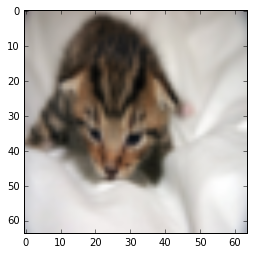

In [27]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print(d["Y_prediction_test"][0,index])#是个float
print(type(d["Y_prediction_test"][0,index]))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_test"][0,index])].decode("utf-8") +  "\" picture.")

Let's also plot the cost function and the gradients.

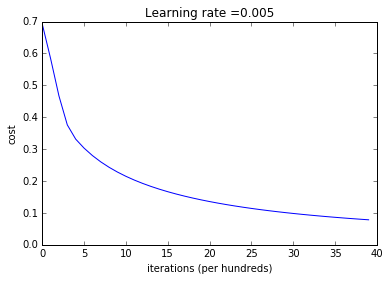

In [63]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

learning rate is: 0.01
cost= 0.69314718056
cost= 1.12017394746
cost= 2.1127183806
cost= 3.1997290178
cost= 0.810026106011
cost= 1.88741099518
cost= 3.18816767605
cost= 0.794978381742
cost= 1.87069741749
cost= 3.151356007
cost= 0.764848165896
cost= 1.80220232509
cost= 3.11305147861
cost= 0.735611741707
cost= 1.72160115382
cost= 3.0698415681
cost= 0.705166162608
cost= 1.62276570653
cost= 3.01822447257
cost= 0.671908180615
cost= 1.49634313513
cost= 2.94902205959
cost= 0.632333980044
cost= 1.31392149531
cost= 2.82834994272
cost= 0.577555854307
cost= 0.966709270091
cost= 2.41687970285
cost= 0.559422479465
cost= 0.847369442436
cost= 1.84850741694
cost= 2.91499524464
cost= 0.606139857489
cost= 1.23642320012
cost= 2.69679006169
cost= 0.526480829081
cost= 0.658280422409
cost= 1.5344517149
cost= 1.29920958215
cost= 2.71444092898
cost= 0.523422286847
cost= 0.719070440535
cost= 1.77944781962
cost= 0.974825243444
cost= 2.36043618336
cost= 0.520980596583
cost= 0.76494354469
cost= 1.67273405642
cost=

cost= 0.715309652647
cost= 0.519761142353
cost= 0.709733113086
cost= 0.51739383061
cost= 0.70417629817
cost= 0.515013808091
cost= 0.698638887422
cost= 0.51262103994
cost= 0.693120557114
cost= 0.510215484845
cost= 0.687620980726
cost= 0.50779709526
cost= 0.682139829452
cost= 0.50536581767
cost= 0.676676772747
cost= 0.502921592877
cost= 0.671231478907
cost= 0.500464356344
cost= 0.665803615705
cost= 0.497994038554
cost= 0.660392851044
cost= 0.495510565427
cost= 0.654998853672
cost= 0.493013858756
cost= 0.64962129391
cost= 0.490503836693
cost= 0.64425984443
cost= 0.487980414259
cost= 0.638914181057
cost= 0.485443503901
cost= 0.633583983605
cost= 0.48289301607
cost= 0.62826893674
cost= 0.480328859843
cost= 0.622968730872
cost= 0.477750943568
cost= 0.617683063061
cost= 0.475159175549
cost= 0.612411637962
cost= 0.47255346475
cost= 0.607154168771
cost= 0.469933721538
cost= 0.601910378203
cost= 0.467299858446
cost= 0.596679999473
cost= 0.464651790963
cost= 0.591462777301
cost= 0.461989438349
co

cost= 0.133375665849
cost= 0.13326408998
cost= 0.133152841296
cost= 0.133041906522
cost= 0.132931288172
cost= 0.132820975737
cost= 0.132710970145
cost= 0.132601262993
cost= 0.132491854112
cost= 0.132382736702
cost= 0.132273909853
cost= 0.13216536799
cost= 0.132057109721
cost= 0.131949130404
cost= 0.13184142835
cost= 0.131733999631
cost= 0.131626842392
cost= 0.131519953254
cost= 0.131413330282
cost= 0.131306970525
cost= 0.131200872026
cost= 0.131095032167
cost= 0.130989449008
cost= 0.130884120192
cost= 0.130779043823
cost= 0.130674217748
cost= 0.130569640128
cost= 0.130465308975
cost= 0.130361222512
cost= 0.130257378885
cost= 0.13015377638
cost= 0.130050413256
cost= 0.129947287859
cost= 0.12984439854
cost= 0.129741743706
cost= 0.129639321783
cost= 0.129537131237
cost= 0.12943517056
cost= 0.129333438268
cost= 0.129231932911
cost= 0.129130653055
cost= 0.129029597298
cost= 0.12892876425
cost= 0.128828152556
cost= 0.128727760867
cost= 0.128627587864
cost= 0.128527632239
cost= 0.128427892711

cost= 0.102147973898
cost= 0.102088711662
cost= 0.102029518599
cost= 0.101970394569
cost= 0.101911339433
cost= 0.101852353054
cost= 0.101793435293
cost= 0.101734586014
cost= 0.101675805079
cost= 0.101617092353
cost= 0.101558447699
cost= 0.101499870982
cost= 0.101441362068
cost= 0.101382920822
cost= 0.10132454711
cost= 0.101266240799
cost= 0.101208001756
cost= 0.101149829849
cost= 0.101091724944
cost= 0.101033686911
cost= 0.100975715619
cost= 0.100917810937
cost= 0.100859972735
cost= 0.100802200882
cost= 0.10074449525
cost= 0.10068685571
cost= 0.100629282133
cost= 0.100571774391
cost= 0.100514332356
cost= 0.100456955902
cost= 0.100399644902
cost= 0.100342399229
cost= 0.100285218757
cost= 0.100228103362
cost= 0.100171052917
cost= 0.100114067298
cost= 0.100057146382
cost= 0.100000290044
cost= 0.0999434981602
cost= 0.0998867706086
cost= 0.0998301072662
cost= 0.0997735080108
cost= 0.0997169727206
cost= 0.0996605012742
cost= 0.0996040935506
cost= 0.0995477494292
cost= 0.0994914687898
cost= 0

cost= 0.593896910762
cost= 0.593456960031
cost= 0.593019194584
cost= 0.592583586022
cost= 0.592150106509
cost= 0.591718728753
cost= 0.591289426
cost= 0.590862172017
cost= 0.590436941078
cost= 0.590013707957
cost= 0.589592447912
cost= 0.589173136674
cost= 0.588755750439
cost= 0.588340265852
cost= 0.587926660001
cost= 0.587514910403
cost= 0.587104994997
cost= 0.586696892131
cost= 0.586290580557
cost= 0.585886039417
cost= 0.585483248235
cost= 0.585082186911
cost= 0.58468283571
cost= 0.584285175253
cost= 0.583889186511
cost= 0.583494850795
cost= 0.58310214975
cost= 0.582711065346
cost= 0.582321579872
cost= 0.581933675927
cost= 0.581547336416
cost= 0.58116254454
cost= 0.58077928379
cost= 0.580397537942
cost= 0.580017291052
cost= 0.579638527445
cost= 0.579261231712
cost= 0.578885388706
cost= 0.578510983533
cost= 0.578138001548
cost= 0.577766428349
cost= 0.577396249773
cost= 0.577027451889
cost= 0.576660020995
cost= 0.576293943611
cost= 0.575929206477
cost= 0.575565796544
cost= 0.575203700976

cost= 0.489309284023
cost= 0.489129823944
cost= 0.488950588733
cost= 0.488771577734
cost= 0.488592790296
cost= 0.488414225769
cost= 0.488235883508
cost= 0.488057762871
cost= 0.487879863217
cost= 0.487702183912
cost= 0.487524724321
cost= 0.487347483814
cost= 0.487170461766
cost= 0.486993657551
cost= 0.486817070549
cost= 0.486640700141
cost= 0.486464545714
cost= 0.486288606654
cost= 0.486112882353
cost= 0.485937372205
cost= 0.485762075606
cost= 0.485586991957
cost= 0.485412120659
cost= 0.485237461118
cost= 0.485063012743
cost= 0.484888774944
cost= 0.484714747134
cost= 0.484540928732
cost= 0.484367319155
cost= 0.484193917826
cost= 0.48402072417
cost= 0.483847737614
cost= 0.483674957588
cost= 0.483502383525
cost= 0.483330014861
cost= 0.483157851033
cost= 0.482985891483
cost= 0.482814135654
cost= 0.482642582991
cost= 0.482471232942
cost= 0.48230008496
cost= 0.482129138497
cost= 0.481958393009
cost= 0.481787847955
cost= 0.481617502796
cost= 0.481447356996
cost= 0.481277410019
cost= 0.4811076

cost= 0.431480560848
cost= 0.431358590046
cost= 0.431236715973
cost= 0.431114938473
cost= 0.43099325739
cost= 0.430871672566
cost= 0.430750183848
cost= 0.430628791079
cost= 0.430507494106
cost= 0.430386292773
cost= 0.430265186927
cost= 0.430144176415
cost= 0.430023261083
cost= 0.429902440779
cost= 0.429781715351
cost= 0.429661084646
cost= 0.429540548514
cost= 0.429420106803
cost= 0.429299759363
cost= 0.429179506044
cost= 0.429059346695
cost= 0.428939281168
cost= 0.428819309313
cost= 0.428699430981
cost= 0.428579646025
cost= 0.428459954297
cost= 0.428340355649
cost= 0.428220849933
cost= 0.428101437004
cost= 0.427982116715
cost= 0.42786288892
cost= 0.427743753474
cost= 0.427624710231
cost= 0.427505759047
cost= 0.427386899776
cost= 0.427268132276
cost= 0.427149456402
cost= 0.427030872012
cost= 0.426912378961
cost= 0.426793977109
cost= 0.426675666312
cost= 0.426557446428
cost= 0.426439317317
cost= 0.426321278837
cost= 0.426203330847
cost= 0.426085473207
cost= 0.425967705777
cost= 0.4258500

cost= 0.389741723991
cost= 0.389648775263
cost= 0.38955588317
cost= 0.389463047646
cost= 0.389370268625
cost= 0.389277546041
cost= 0.38918487983
cost= 0.389092269925
cost= 0.388999716263
cost= 0.388907218777
cost= 0.388814777403
cost= 0.388722392076
cost= 0.388630062732
cost= 0.388537789305
cost= 0.388445571732
cost= 0.388353409948
cost= 0.388261303889
cost= 0.388169253491
cost= 0.38807725869
cost= 0.387985319422
cost= 0.387893435623
cost= 0.38780160723
cost= 0.387709834179
cost= 0.387618116407
cost= 0.38752645385
cost= 0.387434846446
cost= 0.387343294131
cost= 0.387251796843
cost= 0.387160354519
cost= 0.387068967095
cost= 0.38697763451
cost= 0.3868863567
cost= 0.386795133605
cost= 0.38670396516
cost= 0.386612851305
cost= 0.386521791977
cost= 0.386430787114
cost= 0.386339836654
cost= 0.386248940536
cost= 0.386158098698
cost= 0.386067311079
cost= 0.385976577618
cost= 0.385885898252
cost= 0.385795272922
cost= 0.385704701565
cost= 0.385614184121
cost= 0.385523720529
cost= 0.385433310729
c

cost= 0.638810665623
cost= 0.638732242657
cost= 0.63865390318
cost= 0.638575647017
cost= 0.638497473992
cost= 0.638419383932
cost= 0.638341376662
cost= 0.638263452009
cost= 0.6381856098
cost= 0.638107849863
cost= 0.638030172026
cost= 0.637952576118
cost= 0.637875061968
cost= 0.637797629406
cost= 0.637720278263
cost= 0.637643008369
cost= 0.637565819555
cost= 0.637488711654
cost= 0.637411684498
cost= 0.637334737918
cost= 0.637257871749
cost= 0.637181085824
cost= 0.637104379977
cost= 0.637027754043
cost= 0.636951207856
cost= 0.636874741251
cost= 0.636798354065
cost= 0.636722046133
cost= 0.636645817293
cost= 0.636569667381
cost= 0.636493596234
cost= 0.636417603691
cost= 0.63634168959
cost= 0.636265853769
cost= 0.636190096068
cost= 0.636114416325
cost= 0.636038814381
cost= 0.635963290077
cost= 0.635887843252
cost= 0.635812473748
cost= 0.635737181406
cost= 0.635661966068
cost= 0.635586827577
cost= 0.635511765775
cost= 0.635436780505
cost= 0.63536187161
cost= 0.635287038935
cost= 0.6352122823

cost= 0.612692574569
cost= 0.612637235283
cost= 0.612581935156
cost= 0.612526674122
cost= 0.612471452115
cost= 0.612416269069
cost= 0.612361124919
cost= 0.612306019597
cost= 0.61225095304
cost= 0.612195925181
cost= 0.612140935955
cost= 0.612085985297
cost= 0.612031073143
cost= 0.611976199427
cost= 0.611921364085
cost= 0.611866567052
cost= 0.611811808264
cost= 0.611757087657
cost= 0.611702405167
cost= 0.61164776073
cost= 0.611593154282
cost= 0.611538585759
cost= 0.611484055099
cost= 0.611429562237
cost= 0.611375107111
cost= 0.611320689657
cost= 0.611266309814
cost= 0.611211967517
cost= 0.611157662704
cost= 0.611103395314
cost= 0.611049165283
cost= 0.61099497255
cost= 0.610940817052
cost= 0.610886698728
cost= 0.610832617516
cost= 0.610778573354
cost= 0.610724566181
cost= 0.610670595935
cost= 0.610616662556
cost= 0.610562765982
cost= 0.610508906152
cost= 0.610455083006
cost= 0.610401296484
cost= 0.610347546524
cost= 0.610293833066
cost= 0.61024015605
cost= 0.610186515416
cost= 0.610132911

cost= 0.592981630084
cost= 0.592938005624
cost= 0.592894402638
cost= 0.592850821099
cost= 0.592807260979
cost= 0.59276372225
cost= 0.592720204884
cost= 0.592676708854
cost= 0.592633234133
cost= 0.592589780693
cost= 0.592546348505
cost= 0.592502937544
cost= 0.592459547782
cost= 0.592416179191
cost= 0.592372831744
cost= 0.592329505414
cost= 0.592286200174
cost= 0.592242915996
cost= 0.592199652855
cost= 0.592156410722
cost= 0.592113189571
cost= 0.592069989375
cost= 0.592026810107
cost= 0.591983651741
cost= 0.59194051425
cost= 0.591897397606
cost= 0.591854301784
cost= 0.591811226758
cost= 0.591768172499
cost= 0.591725138983
cost= 0.591682126182
cost= 0.591639134071
cost= 0.591596162623
cost= 0.591553211811
cost= 0.59151028161
cost= 0.591467371994
cost= 0.591424482936
cost= 0.59138161441
cost= 0.591338766391
cost= 0.591295938853
cost= 0.591253131769
cost= 0.591210345113
cost= 0.591167578861
cost= 0.591124832986
cost= 0.591082107463
cost= 0.591039402266
cost= 0.590996717369
cost= 0.590954052

cost= 0.576668796897
cost= 0.576632132057
cost= 0.576595480731
cost= 0.576558842905
cost= 0.576522218565
cost= 0.576485607699
cost= 0.576449010293
cost= 0.576412426335
cost= 0.57637585581
cost= 0.576339298705
cost= 0.576302755008
cost= 0.576266224706
cost= 0.576229707785
cost= 0.576193204232
cost= 0.576156714033
cost= 0.576120237177
cost= 0.57608377365
cost= 0.576047323439
cost= 0.576010886531
cost= 0.575974462913
cost= 0.575938052572
cost= 0.575901655495
cost= 0.575865271669
cost= 0.575828901082
cost= 0.57579254372
cost= 0.575756199571
cost= 0.575719868622
cost= 0.57568355086
cost= 0.575647246271
cost= 0.575610954845
cost= 0.575574676567
cost= 0.575538411425
cost= 0.575502159407
cost= 0.575465920499
cost= 0.575429694689
cost= 0.575393481965
cost= 0.575357282313
cost= 0.575321095722
cost= 0.575284922177
cost= 0.575248761668
cost= 0.575212614182
cost= 0.575176479705
cost= 0.575140358226
cost= 0.575104249732
cost= 0.57506815421
cost= 0.575032071649
cost= 0.574996002035
cost= 0.5749599453

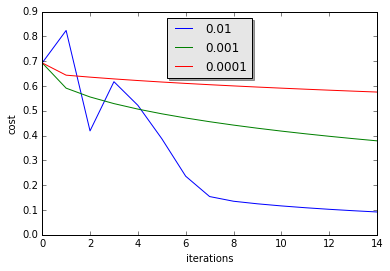

In [67]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.) 


## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

size of X= (12288, 1)
shape size of w= (12288, 1)
reshape size of w= (12288, 1)
size of A= (1, 1)
y = 1.0, your algorithm predicts a "cat" picture.


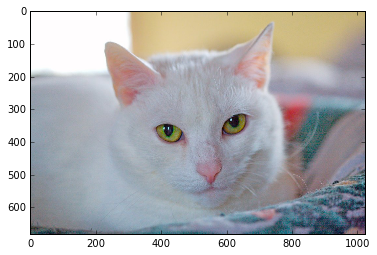

In [68]:
## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "my_image2.jpg"   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c